# Part 1 - Data Pre-processing

In [1]:
## file ini di kembangkan berdasarkan file RNN-Copy3-master

# update terkahir 29 september 2020

## referensi
# https://keras.io/api/losses/
# https://keras.io/api/optimizers/
# https://keras.io/api/layers/recurrent_layers/lstm/

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Path to .csv file location
dataset_train = pd.read_csv('../5.Liguaria/LiguFinal/hasil/hourly-liguria15.csv', sep=",")

# setting hyperparameter n other parameters
optimiz  = 'adam'                # RMSProp
lossku   = 'mean_squared_error'  # 'mean_absolute_error'
activaku = 'tanh'                # sigmoid
ds_train = 360                   # train dataset selama 360 jam = 15 hari, 720 jam = 30 hari
batchku  = 24                    # bactch, mengikuti timestamp
epochku  = 100                   # epok


# setting missing value proccess
mvp = 2851  # 8341, titik awal missing value
mvn = 8     #  jumlah missing value untuk di prediksi

lfd = ds_train   
jkj = batchku    # jumlah jam kolom
training_set = dataset_train.iloc[mvp-lfd:mvp, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 72 timesteps and 1 output
X_train = []
y_train = []

for i in range(jkj, lfd):  ## jadi geser sesuai panjang 72 dan 720
    X_train.append(training_set_scaled[i-jkj:i, 0])
    y_train.append(training_set_scaled[i, 0])
    if i <= jkj:
        print(X_train)
        print(y_train)
        print()
print('struktur X_train dan y_train: ')
print('============================= ')
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape),print(y_train.shape)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

[array([0.63098592, 0.57464789, 0.54647887, 0.52394366, 0.49859155,
       0.48450704, 0.48450704, 0.46478873, 0.45915493, 0.45633803,
       0.48732394, 0.64788732, 0.82816901, 0.93521127, 0.98591549,
       1.        , 0.98591549, 0.96619718, 0.95492958, 0.92676056,
       0.86197183, 0.75492958, 0.65915493, 0.6028169 ])]
[0.571830985915493]

struktur X_train dan y_train: 
(336, 24)
(336,)


# Part 2 - Model

In [2]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


## susun struktur jaringan

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 24, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 24, return_sequences = True))
#regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 24, return_sequences = True))
#regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 24))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1, activation=activaku))

Using TensorFlow backend.


In [3]:
# Pilih settingan 
regressor.compile(optimizer = optimiz, loss = lossku)

# proses pembelajaran
vb = regressor.fit(X_train, y_train, epochs = epochku, batch_size = batchku)

Epoch 1/100
336/336 [==============================] - 1s 4ms/step - loss: 0.1195
Epoch 2/100
336/336 [==============================] - 0s 1ms/step - loss: 0.0435
Epoch 3/100
336/336 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 4/100
336/336 [==============================] - 0s 878us/step - loss: 0.0367
Epoch 5/100
336/336 [==============================] - 0s 804us/step - loss: 0.0365
Epoch 6/100
336/336 [==============================] - 0s 837us/step - loss: 0.0353
Epoch 7/100
336/336 [==============================] - 0s 804us/step - loss: 0.0331
Epoch 8/100
336/336 [==============================] - 0s 797us/step - loss: 0.0325
Epoch 9/100
336/336 [==============================] - 0s 801us/step - loss: 0.0316
Epoch 10/100
336/336 [==============================] - 0s 813us/step - loss: 0.0294
Epoch 11/100
336/336 [==============================] - 0s 812us/step - loss: 0.0288
Epoch 12/100
336/336 [==============================] - 0s 794us/step - loss: 0.

336/336 [==============================] - 0s 978us/step - loss: 0.0070
Epoch 99/100
336/336 [==============================] - 0s 824us/step - loss: 0.0062
Epoch 100/100
336/336 [==============================] - 0s 1ms/step - loss: 0.0058


In [ ]:
#vb.history

# Part 3 - mengisi missing value 

[ 7.05   7.15   8.2   10.8   13.    14.25  14.75  14.15  13.4   12.1
 11.25  11.35  11.3   11.    10.5   10.2    9.442  9.155  8.893  8.708
  8.619  8.645  8.787  9.041]



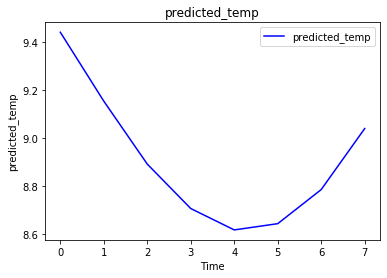

In [4]:
## loop sepanjang missing value
#mvn = 8 #  jumlah missing value untuk di prediksi

inpr = dataset_train['temp'][mvp-jkj:mvp].values   # mvp adalah titik missing value pertama


for i in range (mvn):
    inp = inpr.reshape(-1,1)
    inp = sc.transform(inp)
    X1_test = np.array(np.transpose(inp))
    X1_test = np.reshape(X1_test, (X1_test.shape[0], X1_test.shape[1], 1))
    len(X1_test[0]), len(X1_test)

    ## predict with model
    predicted_temp1 = regressor.predict(X1_test)
    ## rescale
    predicted_temp1 = sc.inverse_transform(predicted_temp1)
    ## insert new value to the end of array
    inpb = np.append(inpr, float("{:.3f}".format(predicted_temp1[0][0])))
    ## trim first index, to fit 72 again
    inpbb = np.delete(inpb, 0)
    inpr = inpbb
print(inpr)
print()

# Visualising the results
#plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(inpr[-mvn:], color = 'blue', label = 'predicted_temp')
plt.title('predicted_temp')
plt.xlabel('Time')
plt.ylabel('predicted_temp')
plt.legend()
plt.show()

## Extract data hasil prediksi

In [5]:
sh = mvn
dsh= dataset_train['temp'][mvp-sh-jkj-24:mvp-24].values
inpku = dsh[:jkj]

for i in range (sh):
    inprs = inpku.reshape(-1,1)
    inprs = sc.transform(inprs)
    X1s_test = np.array(np.transpose(inprs))
    X1s_test = np.reshape(X1s_test, (X1s_test.shape[0], X1s_test.shape[1], 1))
    len(X1s_test[0]), len(X1s_test)

    ## predict with model
    predicted_temp1s = regressor.predict(X1s_test)
    ## rescale
    predicted_temp1s = sc.inverse_transform(predicted_temp1s)
    ## insert new value to the end of array
    inpbs = np.append(inpku, predicted_temp1s[0][0])
    ## trim first index, to fit 72 again
    inpbbs = np.delete(inpbs, 0)
    inpku = inpbbs
print(inpbbs)
print(len(inpbbs))

[ 8.15        8.05        7.85        7.75        7.75        7.65
  7.6         7.55        7.6         7.95        8.75        9.7
 11.05       12.35       13.9        15.5        14.93242359 15.2765131
 15.08038998 14.54202652 13.77995968 12.89466286 11.97967148 11.10066891]
24


In [6]:
#https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html

def rmse(targets, predictions):
    return np.sqrt(((targets - predictions) ** 2).mean())

def mae(targets, predictions):
    return ((abs(targets - predictions)).mean())

def r2(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

prediksi = inpbbs[-sh:]
target = dsh[-sh:]
drmse = rmse(prediksi, target )
dmae  = mae(prediksi, target )
dr2   = r2(target, prediksi )


print('RMSE : ', drmse)
print('R**2 : ', dr2)
print('MAE : ', dmae)

# Append-adds at last 
file1 = open("rekap.txt","a")#append mode 
LL = "{}, {}, {}, {}, {}, {}, {}, {}, {}, {} \n". format (optimiz, lossku, activaku, ds_train, batchku, epochku, drmse, dmae, dr2, inpr[-9:])
file1.write(LL) 
file1.close() 

RMSE :  0.7317686287031148
R**2 :  0.6657052614328444
MAE :  0.6530579805374146


In [7]:
prediksi

array([14.93242359, 15.2765131 , 15.08038998, 14.54202652, 13.77995968,
       12.89466286, 11.97967148, 11.10066891])

In [8]:
target

array([15.95, 15.35, 14.6 , 14.85, 14.55, 13.8 , 13.05, 11.7 ])

## 3 Visualisasi

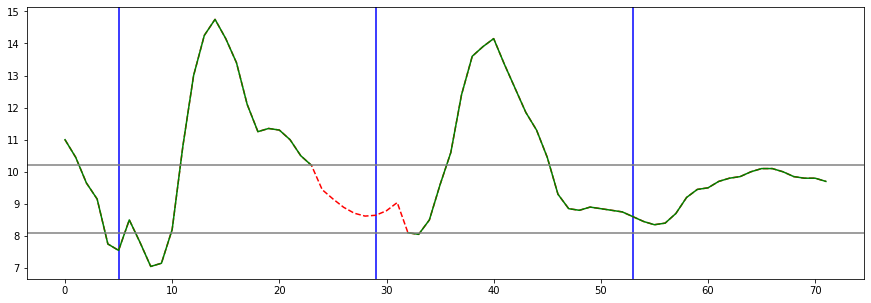

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

rantang = 3 # rentang hari 
mulai = 1 # di mulai x hari sejak mvp
#mvp = 2851
yyp = inpr[-mvn:]

#dataset_train['temp'][2851-1:2851+10]
perjam = list()

for i in range (0,8760):
    dda = ( i, dataset_train['temp'][i])
    dff = list(dda)
    perjam.append(dff)


plt.figure(figsize=(15,5))
zz = []
for i in range(0, 24*rantang):   
    ss=perjam[mvp-(24*mulai)+i][1]       # undur 7 hari sebelum
    xxx = perjam[(mvp-(24*21))+i][0]  # jika 0 maka indexnya, 1 nilainya
    
    zz.append(ss)
    if (xxx%24 ==0):
        plt.axvline(x=i, color = 'blue')
#print(zz)

## isi prediksi missing data
ccc = list()
zzp = zz.copy()
k = 0
for i in range (0,len(zzp)):
    cc = pd.isnull(zzp)[i]
    if (cc == True):
        zzp[i]=yyp[k]
        k += 1    

plt.plot(zzp, color = 'red',linestyle='dashed' )
plt.plot(zz, color = 'green')
plt.axhline(y=10.2, color = 'grey')
plt.axhline(y=8.1, color = 'grey')